In [1]:
import numpy as np
from scipy.optimize import linprog
from tqdm.notebook import tqdm_notebook as tqdm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Problem
> Source: https://stats.stackexchange.com/questions/105557/stochastic-programming-with-mcmc/110063#110063

$$
\begin{equation*}
\begin{array}{rrl}
    \mathbf{x}^* = \underset{\mathbf{x}}{\text{arg}\;\text{min}}        & \mathbb{E}\,(c_1x_1 -3x_2)\\
    \mbox{s.t.} & -x_1 +x_2 & \le  b_1 \\
                & x_1, x_2 & \geq  0
    \end{array}
\end{equation*}
$$

$$
c_1 \sim N(2,0.5)
$$

$$
b_1 \sim N(0,3)
$$

I'll generate scenarios and solve the problem over those scenarios.

In [6]:
N = 100_000 # Simulation count

sols = np.zeros((N, 3)) # Solutions

for i in tqdm(range(N)):
    c1 = 2 + np.sqrt(0.5) * np.random.randn()
    b1 = 0 + np.sqrt(3.0) * np.random.randn()
    
    obj = [c1, -3]

    lhs_ineq = [[-1, 1]]
    rhs_ineq = [b1]

    bnd = [(0, float("inf")),
           (0, float("inf"))]

    opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")
    sols[i][0] = opt['x'][0] 
    sols[i][1] = opt['x'][1]
    sols[i][2] = opt['fun']

  0%|          | 0/100000 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame(sols, columns=['x1', 'x2', 'obj'])
df.describe()

,x1,x2,obj
count,100000.000000,100000.000000,100000.000000
mean,0.690343,0.694047,-0.707058
std,1.009074,1.012582,4.445181
min,0.000000,0.000000,-23.201263
25%,0.000000,0.000000,-3.542686
50%,0.000000,0.001874,-0.017837
75%,1.168231,1.180895,2.109787
max,8.087263,7.733754,26.138838


In [8]:
idx_min = df['obj'].argmin()
x1opt = df['x1'][idx_min]
x2opt = df['x2'][idx_min]
print(f"Index {idx_min}: x1={x1opt}, x2={x2opt}, opt={df['obj'].min()}")

Index 56848: x1=0.0, x2=7.733754251238917, opt=-23.20126275371675


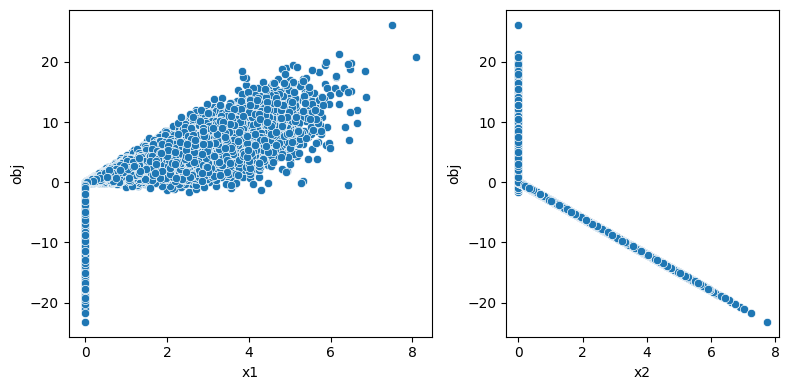

In [9]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=df, x='x1', y='obj', ax=axs[0])
sns.scatterplot(data=df, x='x2', y='obj', ax=axs[1])
f.tight_layout()